# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import numpy as np

df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [26]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [27]:
# Record your observations here 

# Numerical variables are present as 'crim', 'zn', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio',
# 'b', 'lstat', and 'medv'
# Categorical varialbes are 'chas' and 'rad' - these won't be suitable for regression


### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


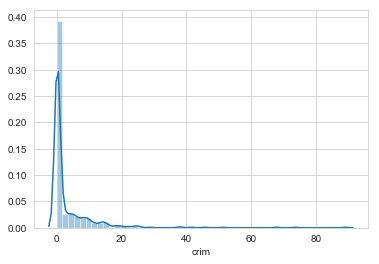

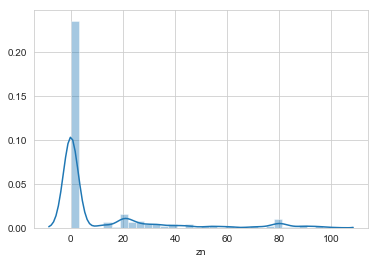

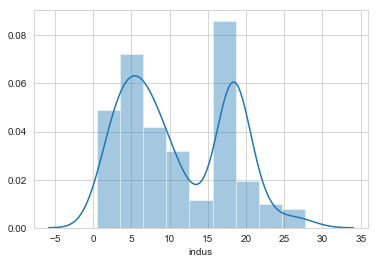

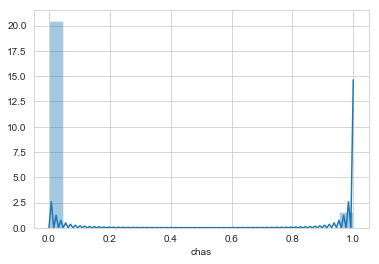

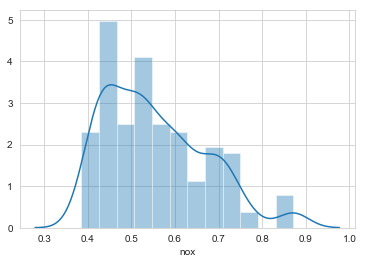

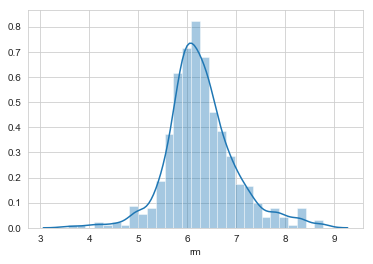

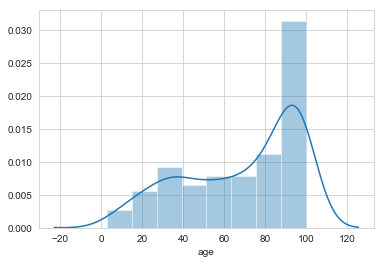

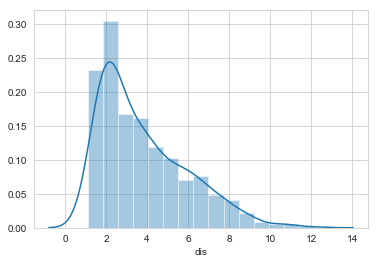

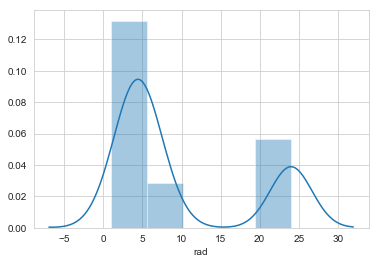

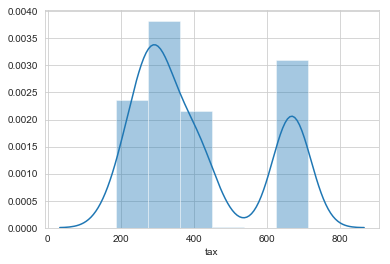

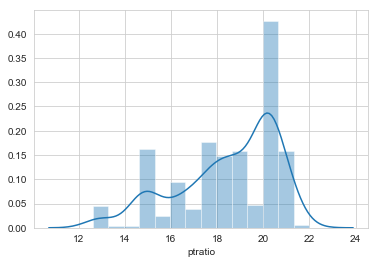

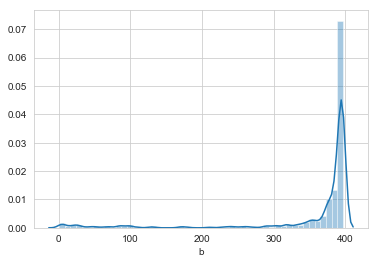

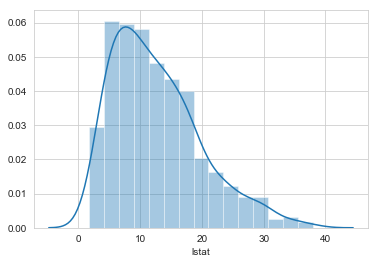

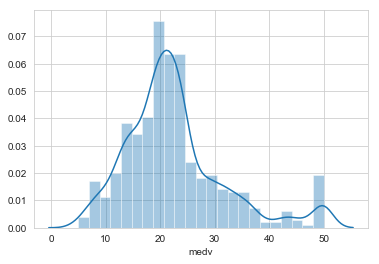

In [28]:
for i, col in enumerate(df):
    plt.figure(i)
    sns.distplot(df[col])

### 'rm' and 'medv' have fairly uniform, normal looking distributions

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [29]:
df1 = df.loc[:, ['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df1.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

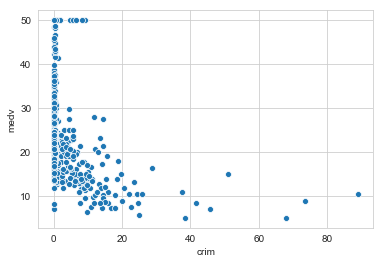

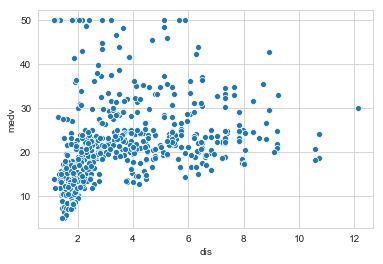

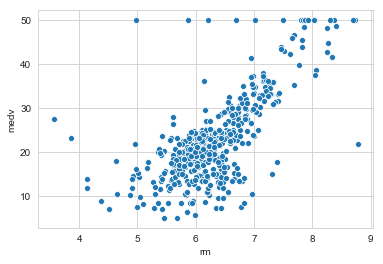

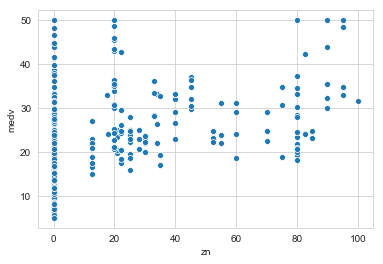

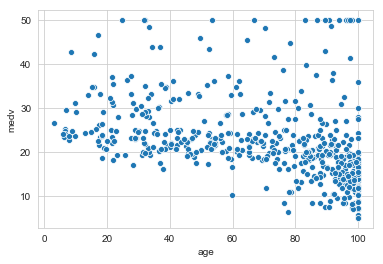

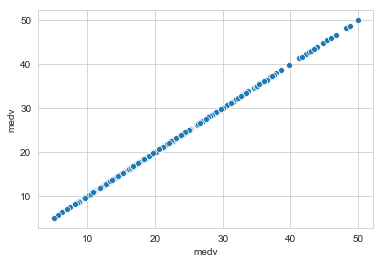

In [30]:
for i, col in enumerate(df1):
    plt.figure(i)
    sns.scatterplot(df1[col], df1['medv'])

In [31]:
# Your observations here 

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.17e-19
Time:                        11:22:54   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
crim          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

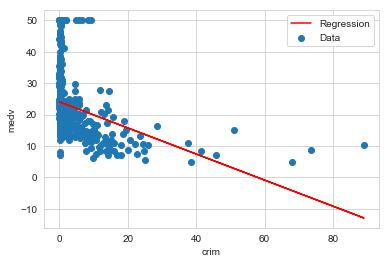

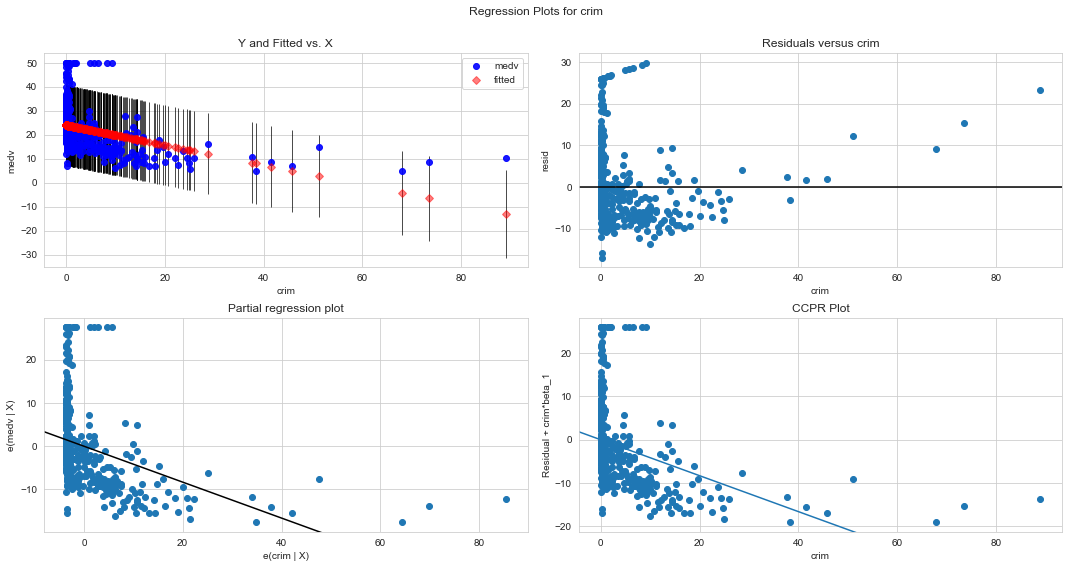

[{'Ind. Var.': 'crim'}, {'R^2': 0.15078046904975706}, {'Slope': -0.41519027791509033}, {'y_int': 24.033106174123873}, {'P-value': 1.17398708219449e-19}, {'JB': 295.40371976845887}]


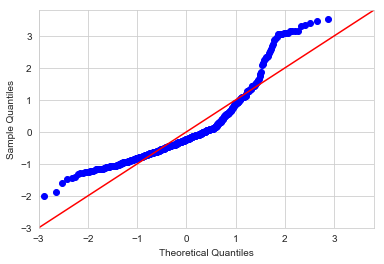

In [49]:
# Get statsmodels OLS regression summary, save regression coefficients to slope and y_int
f = 'medv~crim'
model = ols(formula=f, data=df).fit()
display(model.summary())
slope = model.params.crim
y_int = model.params.Intercept

# Plot scatter plot with regression line
plt.figure()
plt.scatter(df.crim, df.medv, label='Data')
plt.plot(df.crim, df.crim*slope + y_int, color='red', label='Regression')
plt.xlabel('crim')
plt.ylabel('medv')
plt.legend()
plt.show()

# Plot the statsmodels residuals graphs
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'crim', fig=fig)
plt.show()

# Plot Q-Q plot to assess normality of regression residuals
resid1 = model.resid
fig_qq = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig_qq.show

# Store the following values in an list for each iteration
values = []
values.append({'Ind. Var.':'crim'})
values.append({'R^2': model.rsquared})
values.append({'Slope': slope})
values.append({'y_int': y_int})
values.append({'P-value': model.f_pvalue})
values.append({'JB': model.diagn['jb']})
print(values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.17e-19
Time:                        11:48:59   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
crim          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

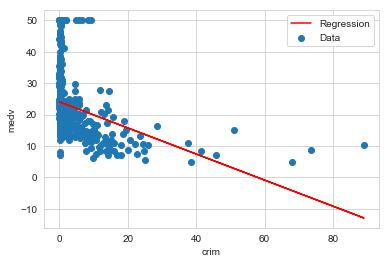

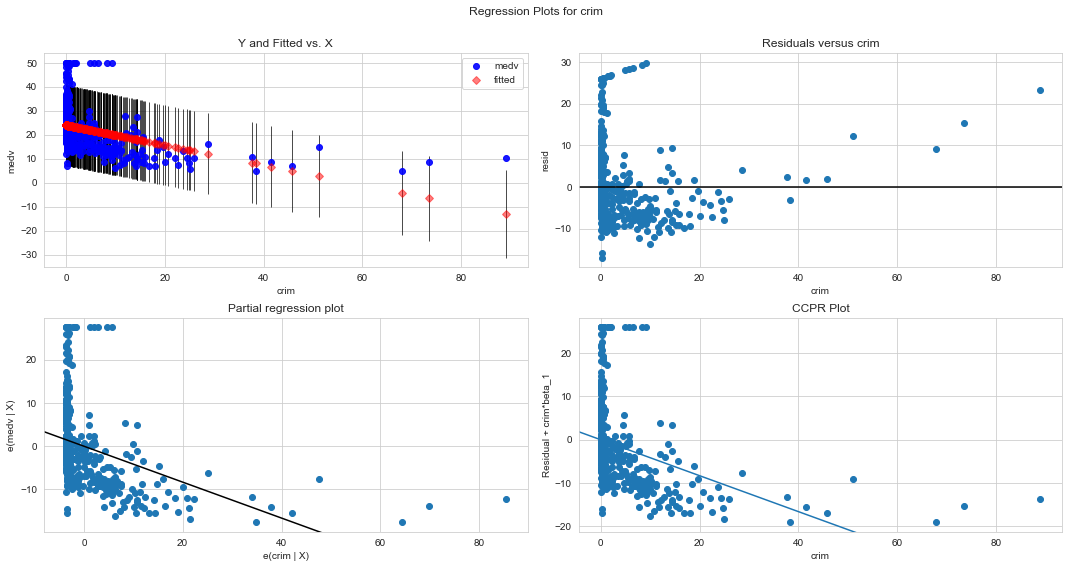

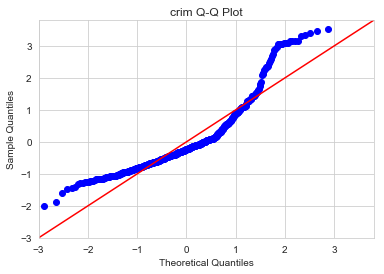

[{'Ind. Var.': 'crim'}, {'R^2': 0.15078046904975706}, {'Slope': -0.41519027791509033}, {'y_int': 24.033106174123873}, {'P-value': 1.17398708219449e-19}, {'JB': 295.40371976845887}]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.21e-08
Time:                        11:48:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

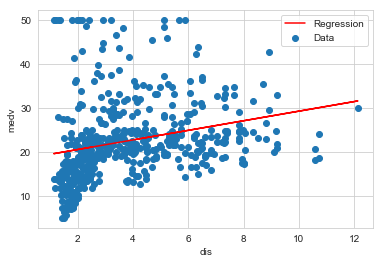

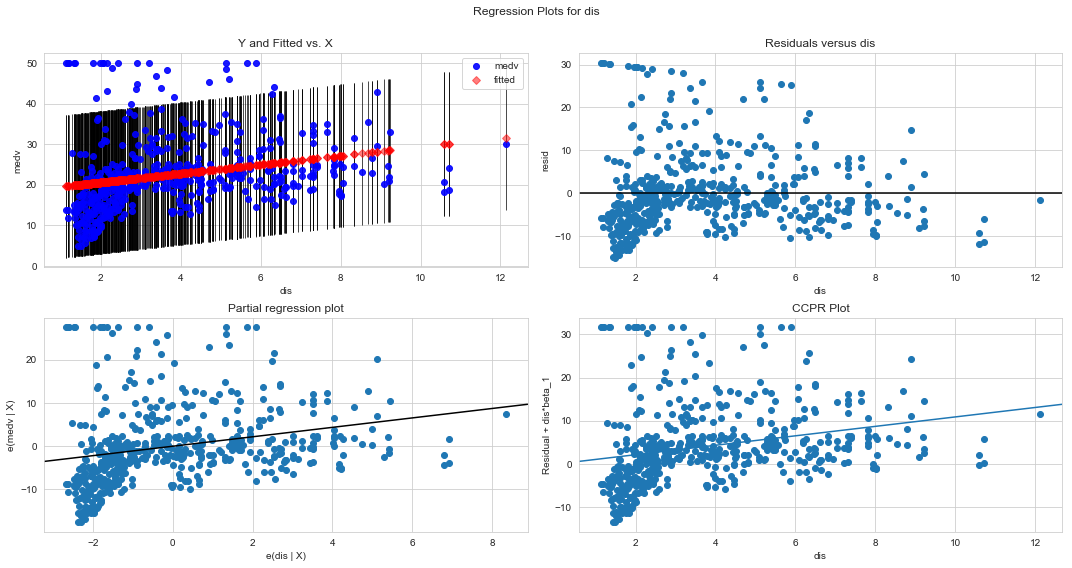

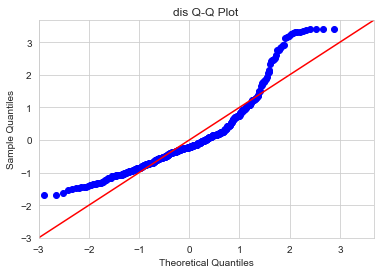

[{'Ind. Var.': 'dis'}, {'R^2': 0.062464372121782796}, {'Slope': 1.09161301584111}, {'y_int': 18.39008833049339}, {'P-value': 1.2066117273371726e-08}, {'JB': 305.104164748274}]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        11:49:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

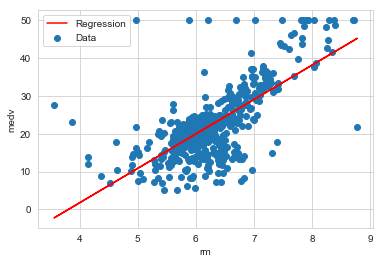

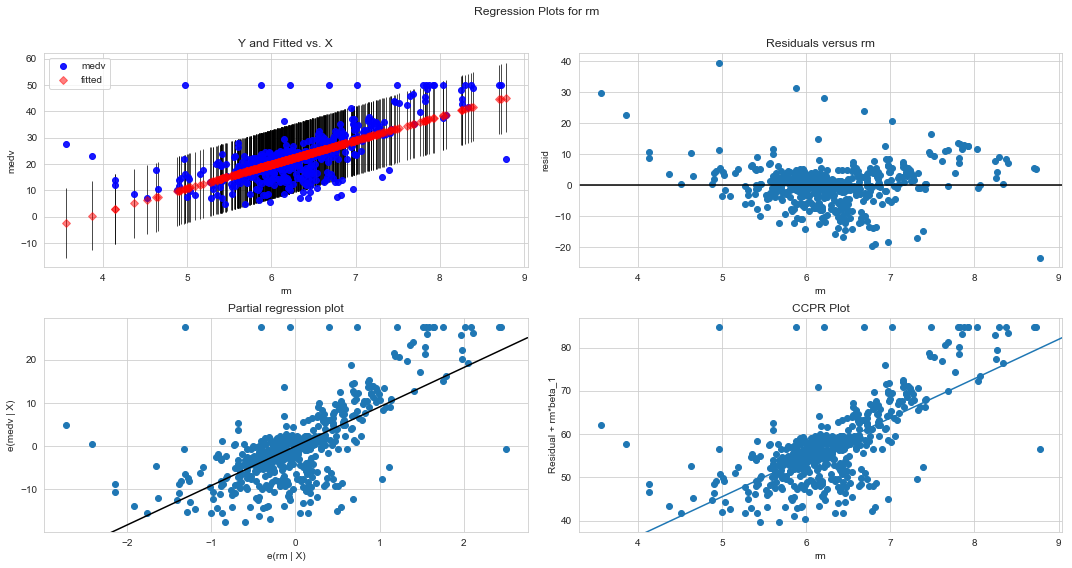

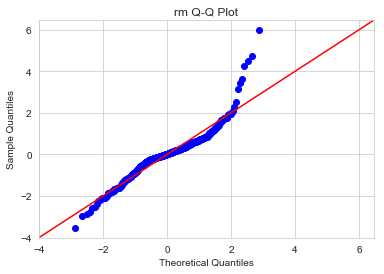

[{'Ind. Var.': 'rm'}, {'R^2': 0.4835254559913341}, {'Slope': 9.102108981180312}, {'y_int': -34.670620776438575}, {'P-value': 2.4872288710080124e-74}, {'JB': 612.4489850641658}]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           5.71e-17
Time:                        11:49:01   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9176      0.425     49.248      0.000      20.083      21.752
zn             0.1421      0.016      8.675      0.000       0.110       0.174
==============================================================================
Omnibus:                      123.531   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.387
Skew:                           1.303   Prob(JB):                     1.06e-57
Kurtosis:                       5.378   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

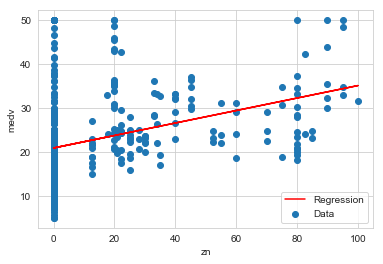

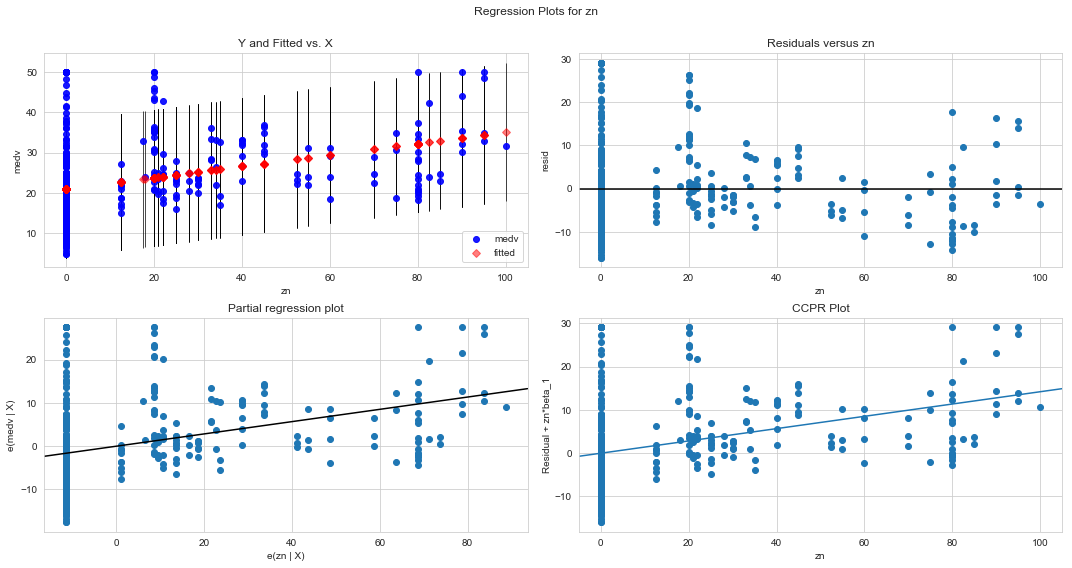

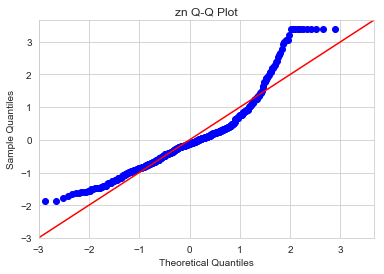

[{'Ind. Var.': 'zn'}, {'R^2': 0.12992084489428946}, {'Slope': 0.14213999415535425}, {'y_int': 20.917579117799825}, {'P-value': 5.71358415308128e-17}, {'JB': 262.3874997814499}]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.57e-18
Time:                        11:49:01   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

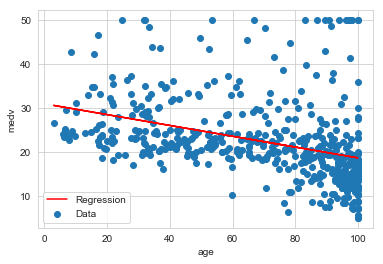

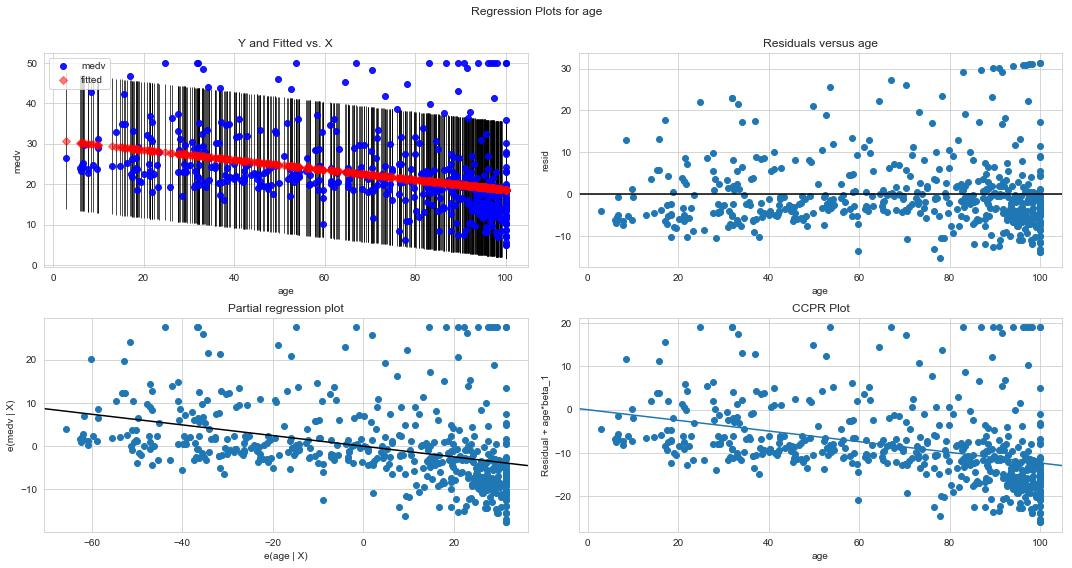

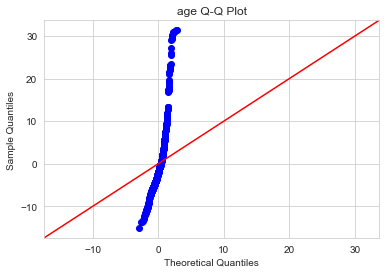

[{'Ind. Var.': 'age'}, {'R^2': 0.14209474407780465}, {'Slope': -0.12316272123567971}, {'y_int': 30.978677762618037}, {'P-value': 1.5699822091881306e-18}, {'JB': 456.9834336489886}]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.701e+33
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:49:02   Log-Likelihood:                 16061.
No. Observations:                 506   AIC:                        -3.212e+04
Df Residuals:                     504   BIC:                        -3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.105e-15   4.68e-16    -17.309      0.000   -9.02e-15   -7.18e-15
medv           1.0000   1.92e-17    5.2e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      126.783   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.493
Skew:                          -1.300   Prob(JB):                     2.26e-63
Kurtosis:                       5.631   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

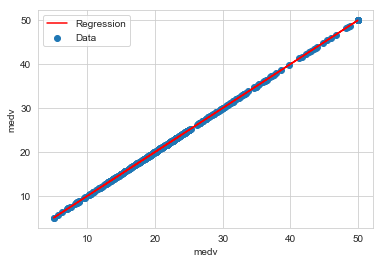

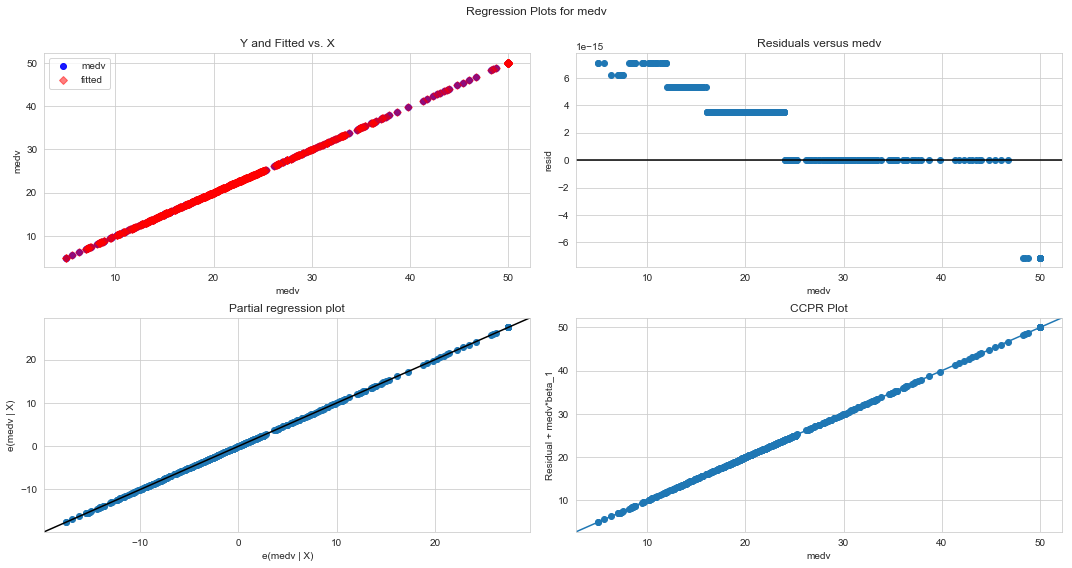

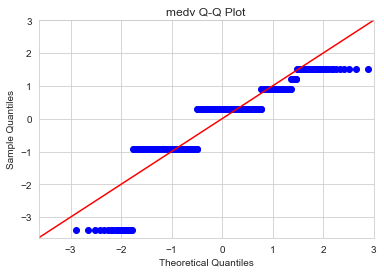

[{'Ind. Var.': 'medv'}, {'R^2': 1.0}, {'Slope': 1.0000000000000002}, {'y_int': -8.104628079763643e-15}, {'P-value': 0.0}, {'JB': 288.4930003620353}]


In [58]:
# Now the same code as above for 'crim', but in a loop for each independent variable
# Loop staring here

for i, col in enumerate(df1):
    f = f'medv~{col}'
    model = ols(formula=f, data=df1).fit()
    display(model.summary())
    slope = model.params[1]
    y_int = model.params.Intercept

    # Plot scatter plot with regression line
    plt.figure()
    plt.scatter(df1[col], df.medv, label='Data')
    plt.plot(df1[col], df1[col]*slope + y_int, color='red', label='Regression')
    plt.xlabel(f'{col}')
    plt.ylabel('medv')
    plt.legend()
    plt.show()

    # Plot the statsmodels residuals graphs
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, f'{col}', fig=fig)
    plt.show()

    # Plot Q-Q plot to assess normality of regression residuals
    resid1 = model.resid
    fig_qq = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
    plt.title(f'{col} Q-Q Plot')
    plt.show()

    # Store the following values in an list for each iteration
    values = []
    values.append({'Ind. Var.':f'{col}'})
    values.append({'R^2': model.rsquared})
    values.append({'Slope': slope})
    values.append({'y_int': y_int})
    values.append({'P-value': model.f_pvalue})
    values.append({'JB': model.diagn['jb']})
    print(values)

In [ ]:
#Your observations here 

## Crim vs. medv observations
#### Residuals and Q-Q plot indicate heteroscedasticity. R^2 value is low (0.15), so 'crim' does not seem to explain much variance in 'medv', and is not a reliable predictor.

## Dis vs. medv observations
#### Residuals and Q-Q plots indicate heteroscedasticity. R^2 value is low (0.06), so 'dis' does not seem to explain much variance in 'medv', and is not a reliable predictor.

## Rm vs. medv observations
#### Residuals look to have less heteroscedasticity than previous values, Q-Q plot still looks concerning. R^2 value is highest of all independent variables (0.48), indicating that 'rm' cane explain about 1/2 of variability in 'medv'.

## Zn vs medv observations
#### Residuals have minor heteroscedasticity, Q-Q plot shows some heteroscedasticity (probably much caused by lack of data cleaning). R^2 value is low (0.13), so we can assume this variable has low predictive value on medv.

## age vs medv observations
#### Based on Q-Q plot, residuals clearly NOT normally distribued. R^2 (0.14) indicates low predictive value for this variable, and residuals have heteroscedasticity.

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.